<a href="https://colab.research.google.com/github/HassenJebali/DeepLearning-Project/blob/main/Regression_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X, y = data.data, data.target
print("Feature ",X)
print("Target ",y)

Feature  [[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
Target  [4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [20]:
df = pd.DataFrame(X, columns=data.feature_names)
# Ajouter la colonne cible au DataFrame
df['target'] = y
# Afficher les informations du DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [16]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.2587 - mae: 0.9313 - val_loss: 0.4946 - val_mae: 0.5033
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5721 - mae: 0.4796 - val_loss: 0.4141 - val_mae: 0.4592
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3812 - mae: 0.4421 - val_loss: 0.3992 - val_mae: 0.4327
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3452 - mae: 0.4174 - val_loss: 0.3797 - val_mae: 0.4305
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3423 - mae: 0.4129 - val_loss: 0.3704 - val_mae: 0.4403
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3414 - mae: 0.4133 - val_loss: 0.3527 - val_mae: 0.4133
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3299 - mae: 0.4030 - val_loss: 0.3497 - val_mae: 0.4089
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3173 - mae: 0.3912 - val_loss: 0.3581 - val_mae: 0.4146
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}")



129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RMSE: 0.53, MAE: 0.35


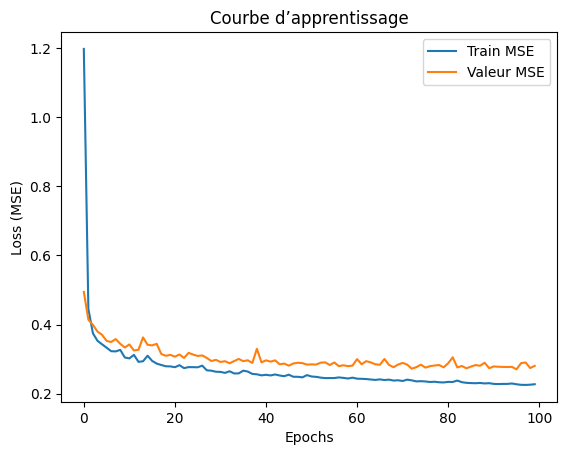

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Valeur MSE')
plt.title("Courbe d’apprentissage")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()
